                    Assignment: Governance indicators

Name: Lukas Birkmayer <br>
Student number: 01616022 <br>
Course of study: Electrical Energy Technology and Sustainable Energy Systems <br>
Project for the course Open Soucre Engery System Modelling <br>


**Overview**<br>
This notebook presents an analysis based on the paper “Governance in socioeconomic pathways and its role for future adaptive capacity”. The task involves examining the role of governance in climate adaptation and mitigation using projections of the Worldwide Governance Indicators for Shared Socioeconomic Pathways (SSPs). The key insights, measurements, and implications of governance on future adaptive capacity are discussed.

**Source Data and Task Overview**<br>
The dataset used in this project is sourced from the SSP Extensions Explorer. It includes historical data and projections for the Governance Index for various countries, spanning from 1996 to 2095 under different SSP scenarios.The objective of this project is to analyze and compare Governance Index projections for selected countries under different Shared Socioeconomic Pathways (SSP) scenarios. The Governance Index measures governance effectiveness based on factors like control of corruption and government effectiveness.

***Project Citation:*** https://doi.org/10.1038/s41893-019-0405-0 <br>

***Data source:*** https://files.ece.iiasa.ac.at/ssp-extensions/downloads/SSP-Extensions_Governance_v1.0.xlsx <br>



**Indicators**<br>
The primary indicators used in this analysis are:

- SSP1 (Sustainability): SSP1 envisions a world that emphasizes sustainability and equality. It assumes that global society will focus on human well-being, environmental sustainability, and reduced inequality.

- SSP2 represents a world following current trends without any major shifts in policy or behavior.

- SSP3 (Regional Rivalry): SSP3 envisions a fragmented world with high challenges to both mitigation and adaptation. It is characterized by Nationalism and regional conflicts driving policy decisions. Additionally, high population growth, particularly in developing countries, with limited advancements in education and health play an important role. As a result there is slower economic development and technological progress.

- SSP5 (Fossil-fueled Development): SSP5 envisions a world with rapid economic growth driven by fossil fuels. Governance improvements here might be driven by economic growth, but environmental policies are weak, leading to high emissions and significant climate impacts. Technological advancements could help with adaptation, but the focus on fossil fuels would exacerbate global warming.

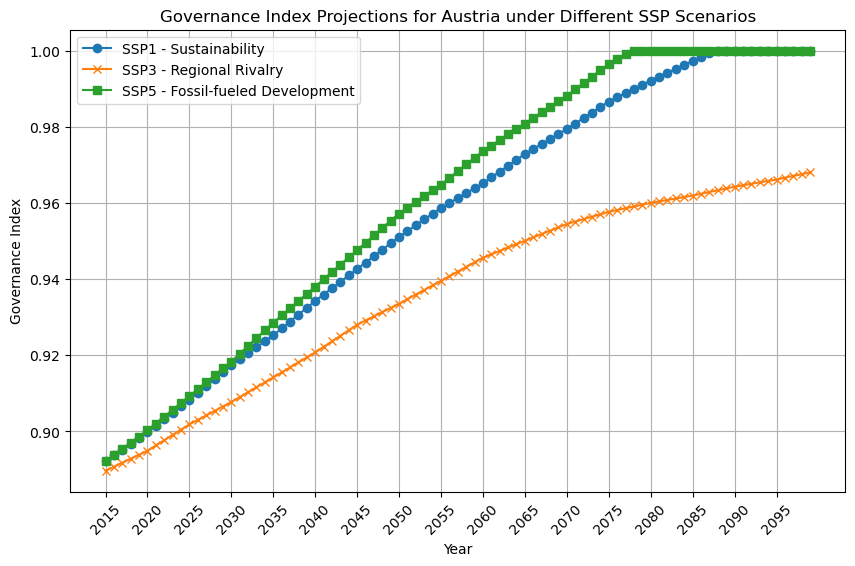

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Loads the Excel file
file_path = r'C:\Users\Lukas\Desktop\SSP-Extensions_Governance.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Tabelle1')

# Filters data for Austria, Germany, and Italy
selected_countries = ['Austria', 'Germany', 'Italy']
country_data = data_df[data_df['Region'].isin(selected_countries)]
country_data = country_data[country_data['Scenario'].isin(['SSP1', 'SSP3', 'SSP5'])]
country_data = country_data[country_data['Variable'] == 'Governance Index']

# Reshapes data for plotting
country_data = country_data.set_index(['Model', 'Scenario', 'Region', 'Variable', 'Unit']).T
country_data = country_data.dropna(axis=0, how='all')
country_data.columns.names = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']

# Drops unnecessary levels
country_data = country_data.droplevel(['Model', 'Unit'], axis=1)

# Plots Governance Index for Austria under different SSP scenarios
try:
    austria_data = country_data.xs('Austria', level='Region', axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(austria_data.index, austria_data['SSP1'], label='SSP1 - Sustainability', marker='o')
    plt.plot(austria_data.index, austria_data['SSP3'], label='SSP3 - Regional Rivalry', marker='x')
    plt.plot(austria_data.index, austria_data['SSP5'], label='SSP5 - Fossil-fueled Development', marker='s')
    plt.xlabel('Year')
    plt.ylabel('Governance Index')
    plt.title('Governance Index Projections for Austria under Different SSP Scenarios')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=austria_data.index[::5], labels=austria_data.index[::5], rotation=45)
    plt.savefig('austria_governance_index.png')
    plt.show()
except KeyError as e:
    print(f"Error accessing data for Austria: {e}")


**Governance Index Projections for Austria under Different SSP Scenarios**<br>
The chart displays projections of the Governance Index for Austria under three different SSP scenarios (SSP1, SSP3, and SSP5) from 2015 to 2095.

***SSP1 - Sustainability:***<br>
The Governance Index for Austria shows a steady and significant increase from 2015 onwards. By 2095, Austria achieves nearly a perfect governance index score of 1.00, indicating highly effective and sustainable governance.

***SSP3 - Regional Rivalry:***<br>
Under this scenario, Austria's Governance Index grows at a much slower rate compared to the other scenarios.The index gradually increases but remains below 0.98 even by 2095, reflecting the challenges posed by regional rivalry and less effective governance improvements.

***SSP5 - Fossil-fueled Development:***<br>
Austria's Governance Index improves rapidly, similar to SSP1, due to strong economic growth and technological advancement. The index reaches approximately 0.99 by 2095, indicating highly effective governance, although the reliance on fossil fuels may pose other long-term sustainability challenges.

***Conclusion***<br>
The chart illustrates that Austria's governance effectiveness is projected to improve under all three scenarios, but the rate and extent of improvement vary significantly. The most optimistic scenario is SSP1, which combines sustainable practices with high governance effectiveness. In contrast, SSP3 shows the slowest improvement due to regional rivalries and fragmented efforts. SSP5 also indicates substantial improvement but highlights the trade-offs between economic growth and environmental sustainability.

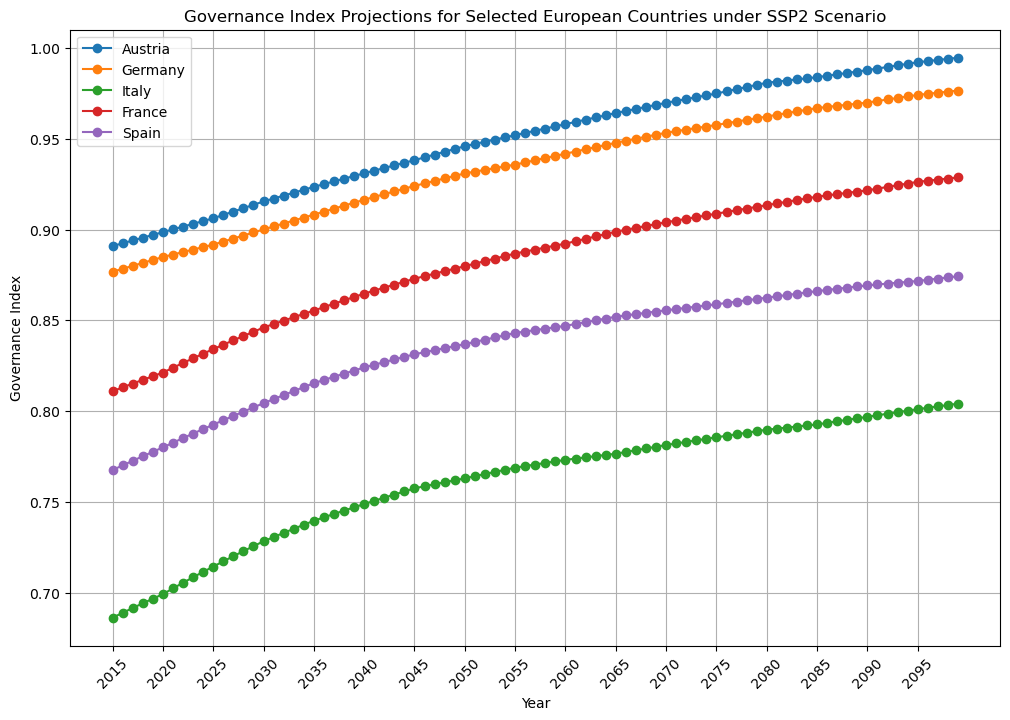

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Loads the Excel file
file_path = r'C:\Users\Lukas\Desktop\SSP-Extensions_Governance.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Tabelle1')

# Filters data for selected European countries under SSP2 scenario
selected_countries = ['Austria', 'Germany', 'Italy', 'France', 'Spain']
europe_data = data_df[data_df['Region'].isin(selected_countries)]
europe_data = europe_data[europe_data['Scenario'] == 'SSP2']
europe_data = europe_data[europe_data['Variable'] == 'Governance Index']

# Reshapes data for plotting
europe_data = europe_data.set_index(['Model', 'Scenario', 'Region', 'Variable', 'Unit']).T
europe_data = europe_data.dropna(axis=0, how='all')
europe_data.columns = europe_data.columns.droplevel([0, 1, 3, 4])

# Plots Governance Index for selected European countries under SSP2 scenario
plt.figure(figsize=(12, 8))
for country in selected_countries:
    plt.plot(europe_data.index, europe_data[country], label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Governance Index')
plt.title('Governance Index Projections for Selected European Countries under SSP2 Scenario')
plt.legend()
plt.grid(True)
plt.xticks(ticks=europe_data.index[::5], labels=europe_data.index[::5], rotation=45)
plt.savefig('europe_governance_index_ssp2.png')
plt.show()


**Governance Index Projections for Selected European Countries under SSP2 Scenario**<br>

The chart illustrates the projected Governance Index for Austria, Germany, Italy, France, and Spain under the SSP2 scenario from 2015 to 2095. The Governance Index, which measures the effectiveness of governance, shows an overall trend of steady improvement for all five countries over the projected period. This suggests that, under the SSP2 scenario, governance in these countries is expected to become more effective over time.

Austria and Germany start with the highest Governance Index values in 2015 and continue to improve at a steady rate, maintaining their lead throughout the period. By 2095, both countries approach a near-perfect Governance Index, indicating highly effective governance.

France begins with a slightly lower Governance Index compared to Austria and Germany but shows consistent improvement. By 2095, France's Governance Index reflects effective governance, although it remains slightly behind Austria and Germany.

Italy and Spain start with the lowest Governance Index values among the five countries in 2015. Despite this, both countries exhibit significant improvements over the years. Italy's Governance Index increases steadily, reflecting notable progress in governance effectiveness. Spain, while starting from the lowest point, also shows continuous improvement, indicating progress in governance, though it remains below the levels of Austria, Germany, and France by 2095.

In summary, the SSP2 scenario projects that all selected European countries will experience improvements in governance effectiveness, with Austria and Germany leading the way, followed by France, Italy, and Spain. This indicates a positive trend towards better governance across these nations over the next eight decades.

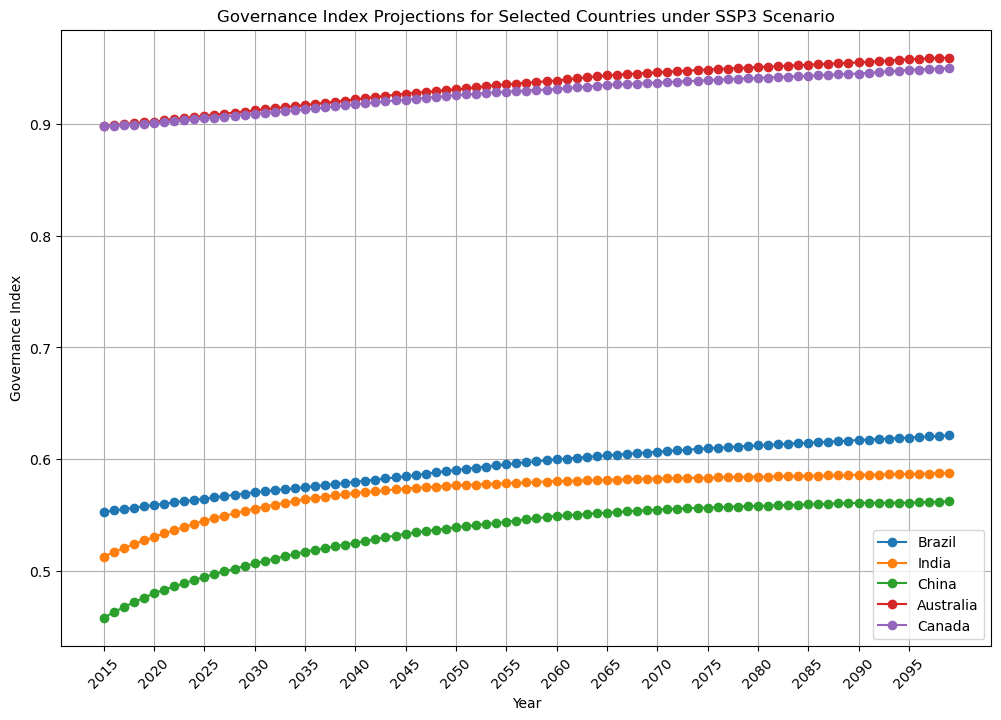

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Loads the Excel file
file_path = r'C:\Users\Lukas\Desktop\SSP-Extensions_Governance.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Tabelle1')

# Filters data for selected countries under a specific SSP scenario
selected_countries = ['Brazil', 'India', 'China', 'Australia', 'Canada']
ssp_scenario = 'SSP3'

# Filters the data for the selected countries and scenario
global_data = data_df[data_df['Region'].isin(selected_countries)]
global_data = global_data[global_data['Scenario'] == ssp_scenario]
global_data = global_data[global_data['Variable'] == 'Governance Index']

# Reshapes data for plotting
global_data = global_data.set_index(['Model', 'Scenario', 'Region', 'Variable', 'Unit']).T
global_data = global_data.dropna(axis=0, how='all')
global_data.columns = global_data.columns.droplevel([0, 1, 3, 4])

# Plots Governance Index for selected countries under SSP3 scenario
plt.figure(figsize=(12, 8))
for country in selected_countries:
    plt.plot(global_data.index, global_data[country], label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Governance Index')
plt.title('Governance Index Projections for Selected Countries under SSP3 Scenario')
plt.legend()
plt.grid(True)

# Adjusts xticks to show 5-year steps
years = [year for year in global_data.index if int(year) % 5 == 0]
plt.xticks(ticks=years, labels=years, rotation=45)
plt.show()


**Governance Index Projections for Selected Countries under SSP3 Scenario**

The Governance Index projections from 2015 to 2095 for Brazil, India, China, Australia, and Canada under the SSP3 scenario show a trend of improvement. Brazil's index starts at around 0.48 in 2015 and increases to 0.6 by 2095, suggesting ongoing efforts to enhance governance and reduce corruption. India's index begins at 0.50 and reaches 0.58, indicating steady reforms and strengthening of governance mechanisms. China's index starts at approximately 0.52 and rises to 0.57, reflecting stable but slower governance progress. Australia, with a high starting index of about 0.9 in 2015, shows a slight increase to 0.92, maintaining its high governance standards. Similarly, Canada's index starts at around 0.9 and reaches 0.93 by 2095, indicating continued strong governance with minor improvements.

All selected countries show an improvement in their Governance Index over the projection period. This reflects a global trend towards better governance, increased transparency, and reduced corruption. The rate of improvement varies among the countries, with Brazil, India, and China showing more significant gains compared to the already well-governed countries like Australia and Canada. This analysis highlights the importance of sustained efforts in governance reforms, particularly in countries starting with lower Governance Index values, to achieve significant improvements over the long term.

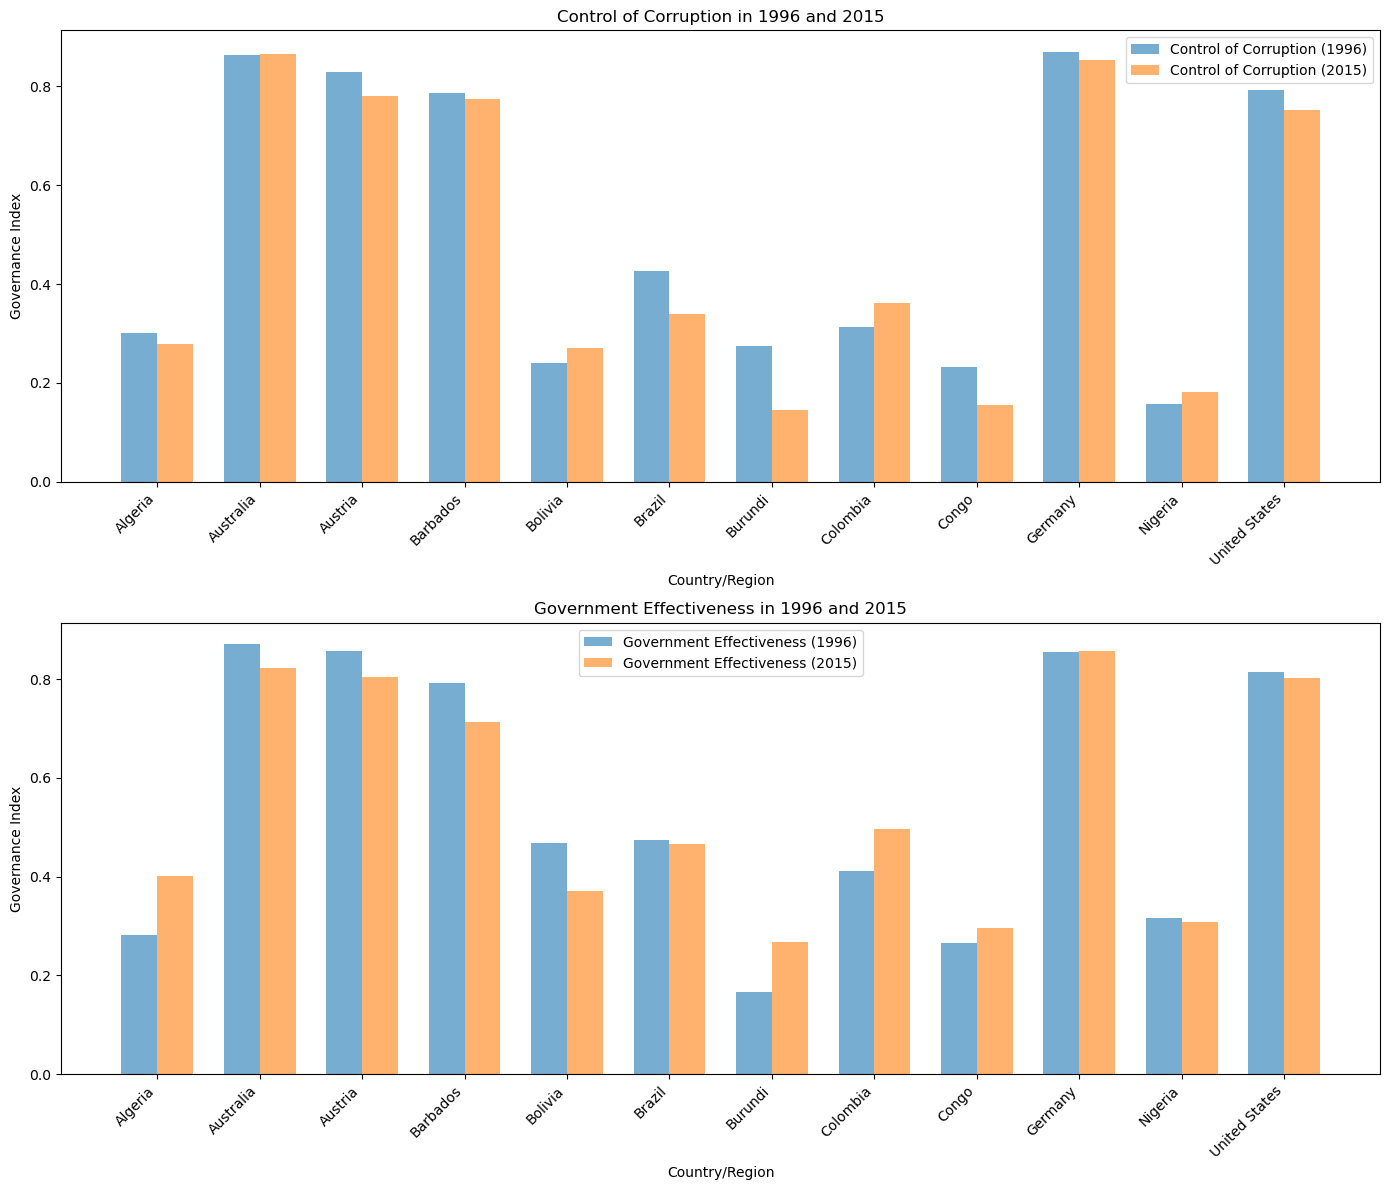

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loads the Excel file
file_path = r'C:\Users\Lukas\Desktop\SSP-Extensions_Governance.xlsx'
data = pd.read_excel(file_path, sheet_name='Tabelle1')

# Filters the data for the required countries and the years 1996 and 2015
countries = ["United States", "Austria", "Germany", "Australia", "Algeria", "Asia", "Barbados", 
             "Bolivia", "Brazil", "Burundi", "Congo", "Colombia", "Nigeria"]
variables = ["Governance Index|Control of Corruption", "Governance Index|Government Effectiveness"]

# Extracts data for 2015
filtered_data_2015 = data[(data['Region'].isin(countries)) & 
                          (data['Variable'].isin(variables))][['Region', 'Variable', '2015']]

# Extracts data for 1996
filtered_data_1996 = data[(data['Region'].isin(countries)) & 
                          (data['Variable'].isin(variables))][['Region', 'Variable', '1996']]

# Merges the two dataframes on 'Region' and 'Variable' directly to ensure alignment
comparison_data = pd.merge(filtered_data_2015, filtered_data_1996, on=['Region', 'Variable'], suffixes=('_2015', '_1996'))

# Removes duplicates from the 'comparison_data' dataframe
comparison_data_cleaned = comparison_data.drop_duplicates(subset=['Region', 'Variable'])

# Pivots the cleaned data to get the correct format for plotting
pivot_data_cleaned = comparison_data_cleaned.pivot(index='Region', columns='Variable').reset_index()

# Extracts the specific columns needed for plotting
corruption_1996 = pivot_data_cleaned[('1996', 'Governance Index|Control of Corruption')]
corruption_2015 = pivot_data_cleaned[('2015', 'Governance Index|Control of Corruption')]
effectiveness_1996 = pivot_data_cleaned[('1996', 'Governance Index|Government Effectiveness')]
effectiveness_2015 = pivot_data_cleaned[('2015', 'Governance Index|Government Effectiveness')]

# Defines bar width and index
bar_width = 0.35
index = np.arange(len(pivot_data_cleaned))

# Plots the bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plots Control of Corruption
axes[0].bar(index, corruption_1996, bar_width, alpha=0.6, label='Control of Corruption (1996)')
axes[0].bar(index + bar_width, corruption_2015, bar_width, alpha=0.6, label='Control of Corruption (2015)')
axes[0].set_xlabel('Country/Region')
axes[0].set_ylabel('Governance Index')
axes[0].set_title('Control of Corruption in 1996 and 2015')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(pivot_data_cleaned['Region'], rotation=45, ha='right')
axes[0].legend()

# Plots Government Effectiveness
axes[1].bar(index, effectiveness_1996, bar_width, alpha=0.6, label='Government Effectiveness (1996)')
axes[1].bar(index + bar_width, effectiveness_2015, bar_width, alpha=0.6, label='Government Effectiveness (2015)')
axes[1].set_xlabel('Country/Region')
axes[1].set_ylabel('Governance Index')
axes[1].set_title('Government Effectiveness in 1996 and 2015')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(pivot_data_cleaned['Region'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()


***Control of Corruption in 1996 and 2015:*** <br>

The Control of Corruption index, which measures the extent to which public power is exercised for private gain, shows varying trends across the selected countries. In developed nations such as Australia, there has been a slight improvement in controlling corruption from 1996 to 2015, reflecting their ongoing efforts to curb corruption. However, countries like Austria and Germany have shown a decrease in their Control of Corruption scores, indicating challenges in maintaining their previous standards.

Colombia and Nigeria have made improvements in their Control of Corruption score, highlighting progress, while Nigeria continues to struggle with higher levels of corruption. The United States has seen a slight decline, which might indicate emerging governance challenges.

***Government Effectiveness in 1996 and 2015:*** <br>

The Government Effectiveness index captures the quality of public services, the civil service, and policy implementation. Developed countries such as Australia, Austria, Germany, and the United States have shown decreases in their scores, indicating potential issues in maintaining effective governance practices over time. This decline suggests challenges in sustaining the quality of public services and policy implementation.

In contrast, many developing countries have made notable improvements. Colombia and Algeria, in particular, have shown significant improvement in Government Effectiveness. Congo has also shown improvement, although it remains moderate compared to higher-scoring countries. Bolivia and Nigeria on the other hand, have shown declines. 

Overall, the data suggests a general trend where developed countries have faced difficulties in maintaining their governance standards, while some developing countries have made progress in improving government effectiveness over the years.

**Ideas for In-Depth Analysis**<br>

A comparative analysis could highlight regional disparities by comparing governance trends between different countries or regions under the same SSP scenario. This can help identify which regions are improving faster and why. It would be possible to investigate how different governance policies or levels of international cooperation affect governance outcomes. Additionally, exploring correlations between the Governance Index and other socioeconomic indicators such as GDP, education levels, healthcare quality, and environmental factors can provide a good overview of the governance effectiveness.